# GL Hackathon - Bullet Train Satisfaction Prediction
### Submitted by Krishnan CS

## Load and merge data

**Reasoning**:
Load the two CSV files into pandas DataFrames and merge them on the 'ID' column.



In [1]:
import pandas as pd

df_travel = pd.read_csv('Traveldata_train.csv')
df_survey = pd.read_csv('Surveydata_train.csv')
df_merged = pd.merge(df_travel, df_survey, on='ID')
display(df_merged.head())

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


## Initial data inspection

### Subtask:
Display descriptive statistics, information about the dataframe, and check for null and duplicate values.


In [2]:
display(df_merged.describe())
display(df_merged.info())
display(df_merged.isnull().sum())
display(df_merged.duplicated().sum())

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222,0.546658
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409,0.497821
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000,1.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

None

,0
ID,0
Gender,77
Customer_Type,8951
Age,33
Type_Travel,9226
Travel_Class,0
Travel_Distance,0
Departure_Delay_in_Mins,57
Arrival_Delay_in_Mins,357
Overall_Experience,0


np.int64(0)

## Univariate analysis

### Subtask:
Plot histograms and box plots for numerical columns to understand their distribution and identify outliers.


In [3]:
df_merged = df_merged.drop('ID', axis=1)
display(df_merged.head())

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [4]:
categorical_cols = df_merged.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"Value Counts for {col}:")
    display(df_merged[col].value_counts(dropna=False))
    print("-" * 30)

Value Counts for Gender:


,count
Gender,
Female,47815
Male,46487
NaN,77


------------------------------
Value Counts for Customer_Type:


,count
Customer_Type,
Loyal Customer,69823
Disloyal Customer,15605
NaN,8951


------------------------------
Value Counts for Type_Travel:


,count
Type_Travel,
Business Travel,58617
Personal Travel,26536
NaN,9226


------------------------------
Value Counts for Travel_Class:


,count
Travel_Class,
Eco,49342
Business,45037


------------------------------
Value Counts for Seat_Comfort:


,count
Seat_Comfort,
Acceptable,21158
Needs Improvement,20946
Good,20595
Poor,15185
Excellent,12971
Extremely Poor,3463
NaN,61


------------------------------
Value Counts for Seat_Class:


,count
Seat_Class,
Green Car,47435
Ordinary,46944


------------------------------
Value Counts for Arrival_Time_Convenient:


,count
Arrival_Time_Convenient,
Good,19574
Excellent,17684
Acceptable,15177
Needs Improvement,14990
Poor,13692
NaN,8930
Extremely Poor,4332


------------------------------
Value Counts for Catering:


,count
Catering,
Acceptable,18468
Needs Improvement,17978
Good,17969
Poor,13858
Excellent,13455
NaN,8741
Extremely Poor,3910


------------------------------
Value Counts for Platform_Location:


,count
Platform_Location,
Manageable,24173
Convenient,21912
Needs Improvement,17832
Inconvenient,16449
Very Convenient,13981
NaN,30
Very Inconvenient,2


------------------------------
Value Counts for Onboard_Wifi_Service:


,count
Onboard_Wifi_Service,
Good,22835
Excellent,20968
Acceptable,20118
Needs Improvement,19596
Poor,10741
Extremely Poor,91
NaN,30


------------------------------
Value Counts for Onboard_Entertainment:


,count
Onboard_Entertainment,
Good,30446
Excellent,21644
Acceptable,17560
Needs Improvement,13926
Poor,8641
Extremely Poor,2144
NaN,18


------------------------------
Value Counts for Online_Support:


,count
Online_Support,
Good,30016
Excellent,25894
Acceptable,15702
Needs Improvement,12508
Poor,10167
NaN,91
Extremely Poor,1


------------------------------
Value Counts for Ease_of_Online_Booking:


,count
Ease_of_Online_Booking,
Good,28909
Excellent,24744
Acceptable,16390
Needs Improvement,14479
Poor,9768
NaN,73
Extremely Poor,16


------------------------------
Value Counts for Onboard_Service:


,count
Onboard_Service,
Good,27265
Excellent,21272
Acceptable,18071
Needs Improvement,11390
Poor,8776
NaN,7601
Extremely Poor,4


------------------------------
Value Counts for Legroom:


,count
Legroom,
Good,28870
Excellent,24832
Acceptable,16384
Needs Improvement,15753
Poor,8110
Extremely Poor,340
NaN,90


------------------------------
Value Counts for Baggage_Handling:


,count
Baggage_Handling,
Good,34944
Excellent,26003
Acceptable,17767
Needs Improvement,9759
Poor,5764
NaN,142


------------------------------
Value Counts for CheckIn_Service:


,count
CheckIn_Service,
Good,26502
Acceptable,25803
Excellent,19641
Needs Improvement,11218
Poor,11137
NaN,77
Extremely Poor,1


------------------------------
Value Counts for Cleanliness:


,count
Cleanliness,
Good,35427
Excellent,26053
Acceptable,17449
Needs Improvement,9806
Poor,5633
NaN,6
Extremely Poor,5


------------------------------
Value Counts for Online_Boarding:


,count
Online_Boarding,
Good,25533
Acceptable,22475
Excellent,21742
Needs Improvement,13451
Poor,11160
Extremely Poor,12
NaN,6


------------------------------


In [5]:
# Mapping categorical columns to numerical
mapping_quality = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
mapping_platform = {'Very Inconvenient': 1, 'Inconvenient': 2, 'Needs Improvement': 3, 'Manageable': 4, 'Convenient': 5, 'Very Convenient': 6}


quality_cols = ['Seat_Comfort','Arrival_Time_Convenient','Catering','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

# Re-load the original dataframes to ensure the latest data is used
df_travel_original = pd.read_csv('Traveldata_train.csv')
df_survey_original = pd.read_csv('Surveydata_train.csv')
df_merged = pd.merge(df_travel_original, df_survey_original, on='ID')

# Drop 'ID' column again after merging
df_merged = df_merged.drop('ID', axis=1)

for col in quality_cols:
    df_merged[col] = df_merged[col].map(mapping_quality)

df_merged['Platform_Location'] = df_merged['Platform_Location'].map(mapping_platform)

display(df_merged.head())

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,3.0,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,2.0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
2,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,3.0,...,3.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0
3,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,4.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
4,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,4.0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


Processing column: Age


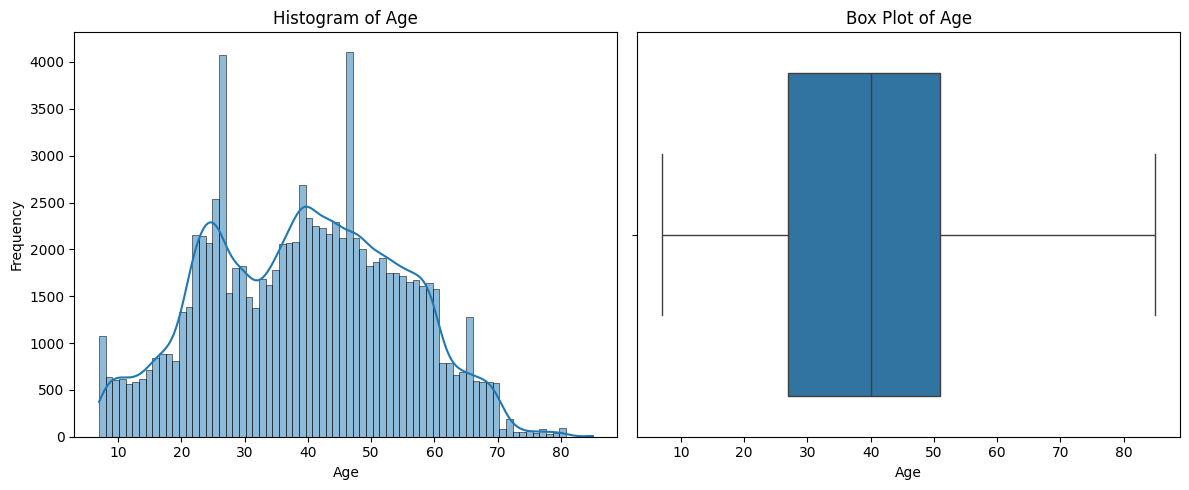

Processing column: Travel_Distance


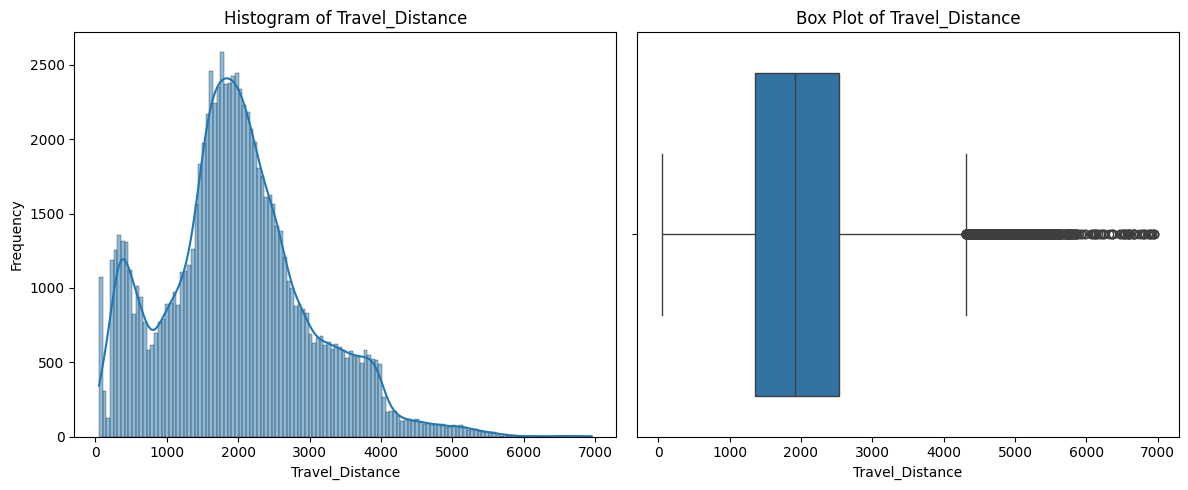

Processing column: Departure_Delay_in_Mins


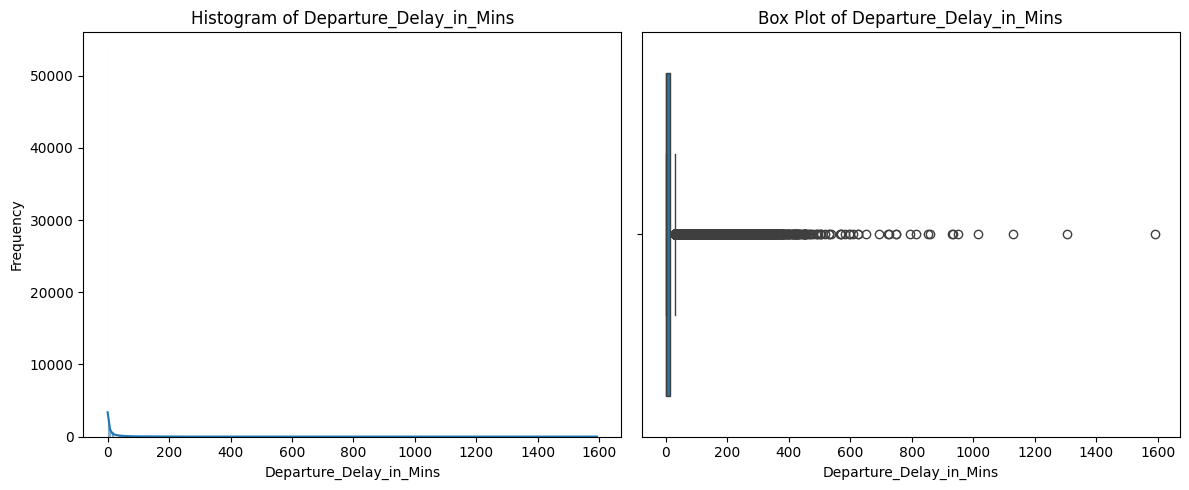

Processing column: Arrival_Delay_in_Mins


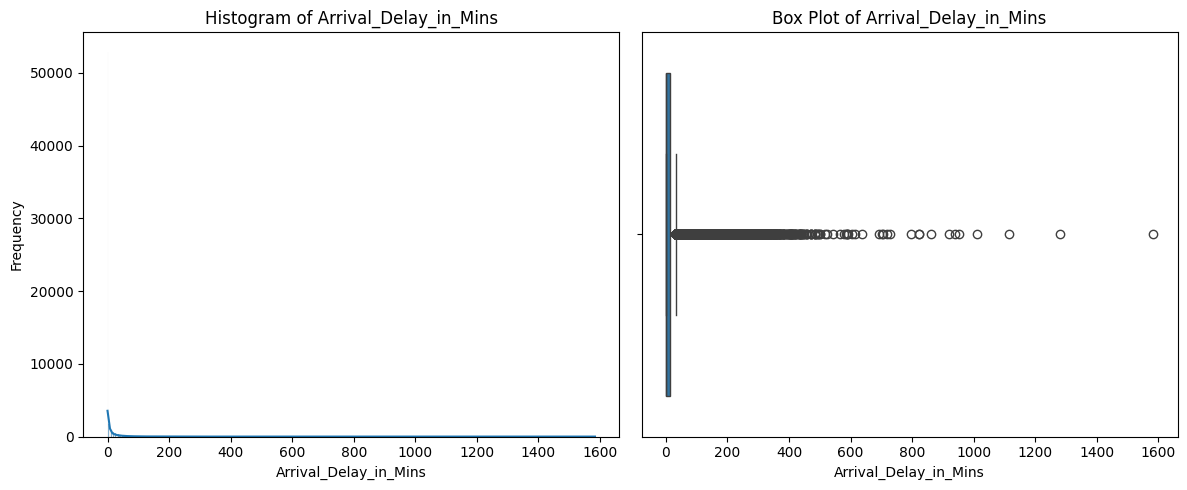

Processing column: Overall_Experience


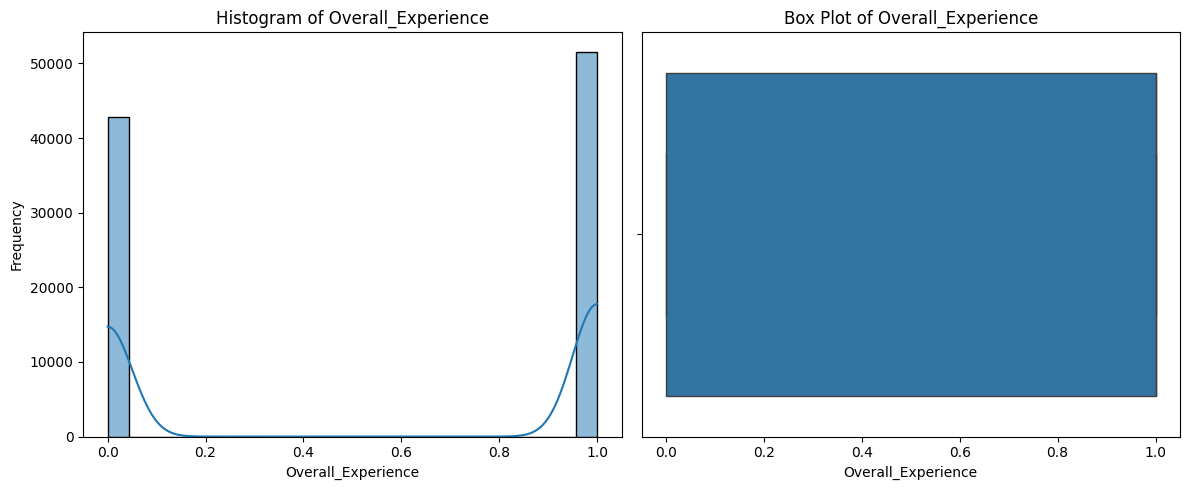

Processing column: Seat_Comfort


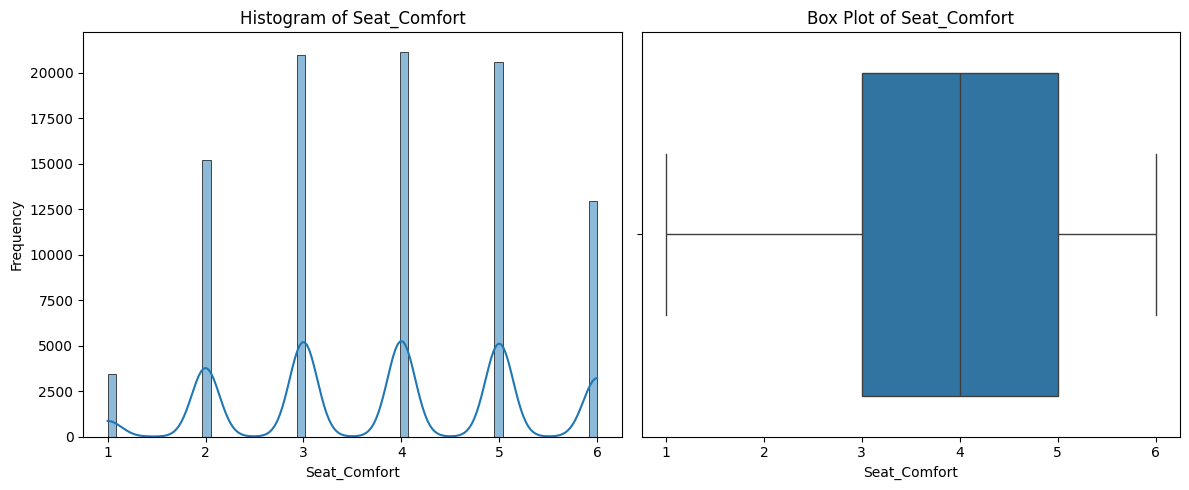

Processing column: Arrival_Time_Convenient


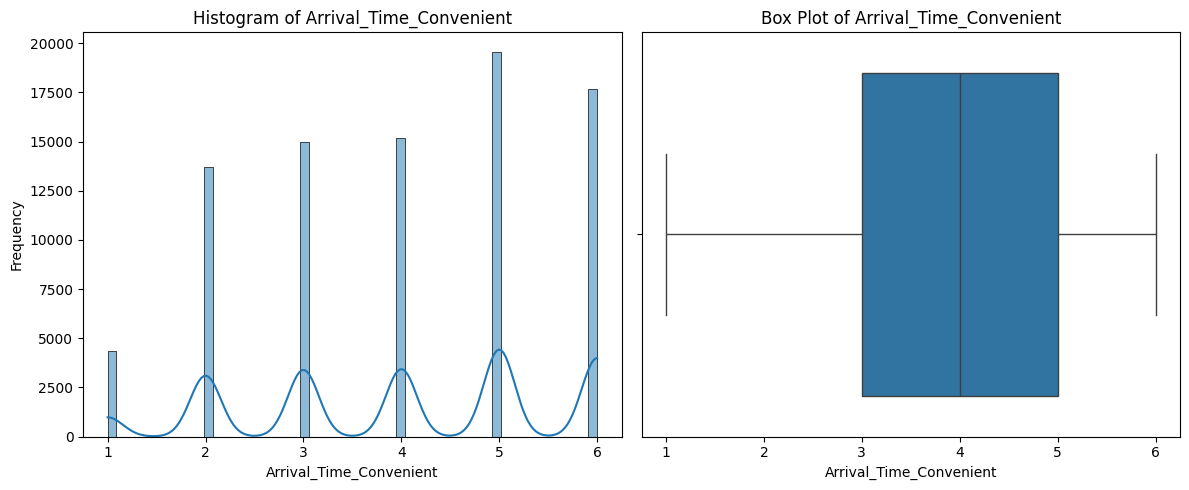

Processing column: Catering


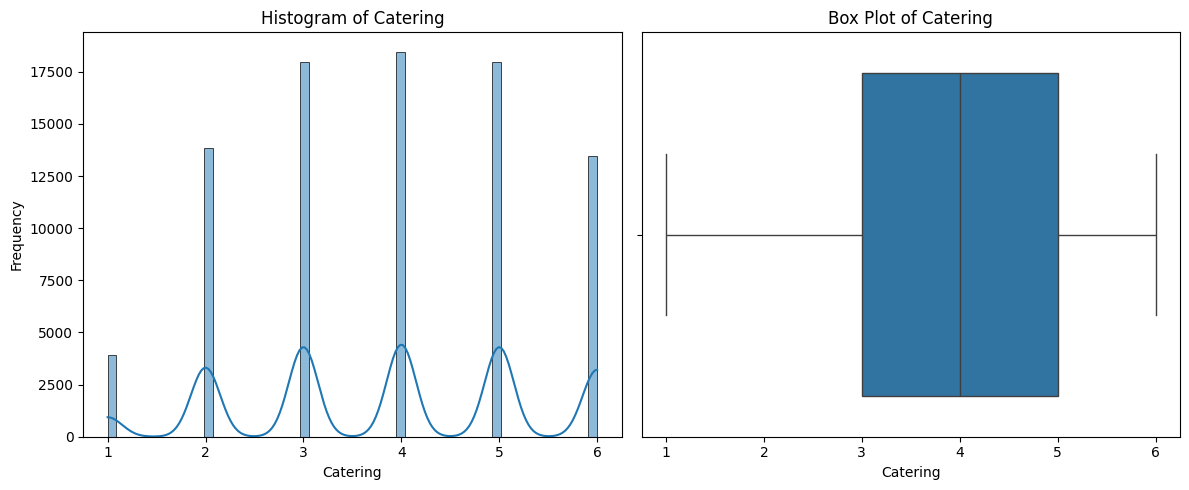

Processing column: Platform_Location


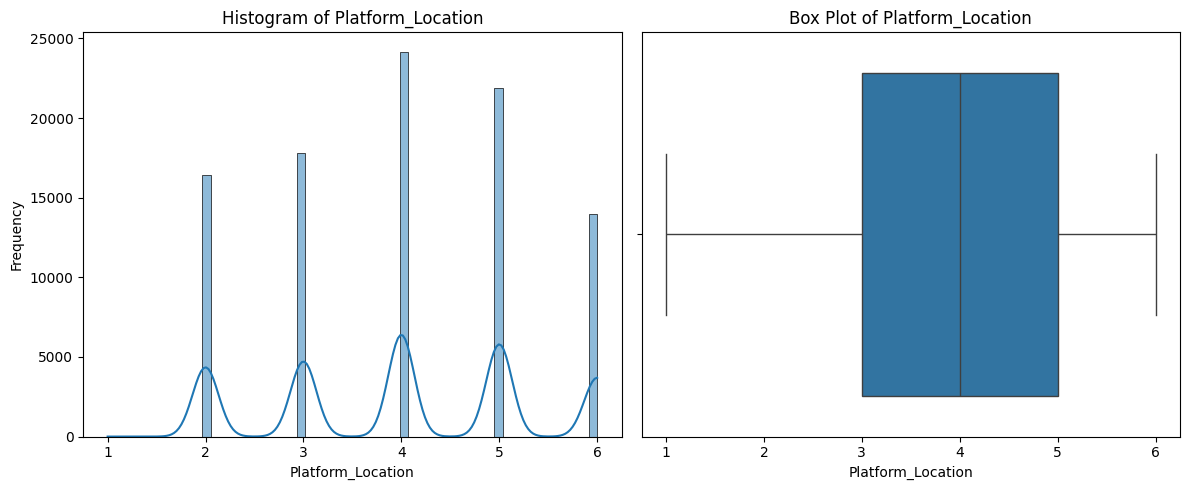

Processing column: Onboard_Wifi_Service


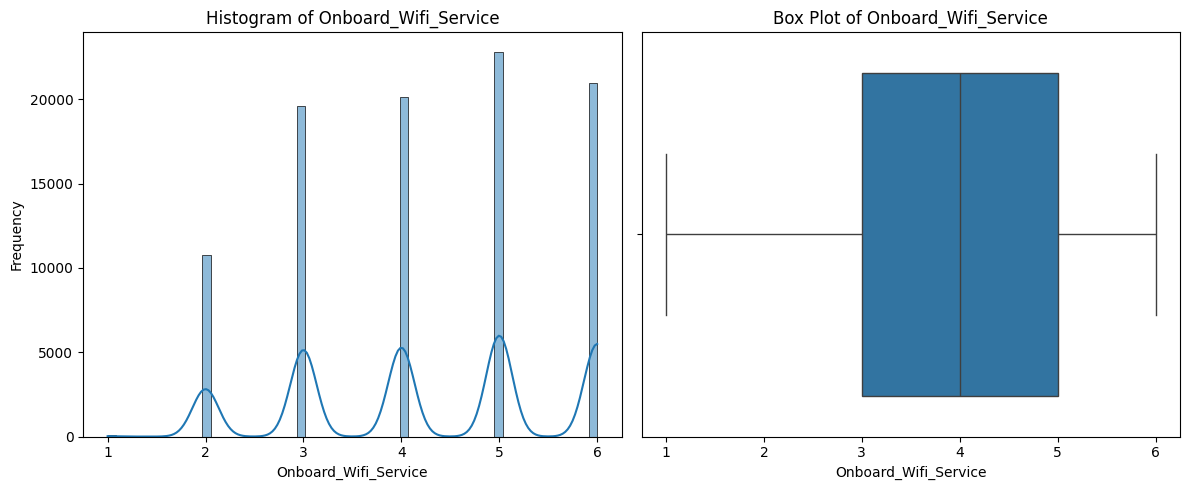

Processing column: Onboard_Entertainment


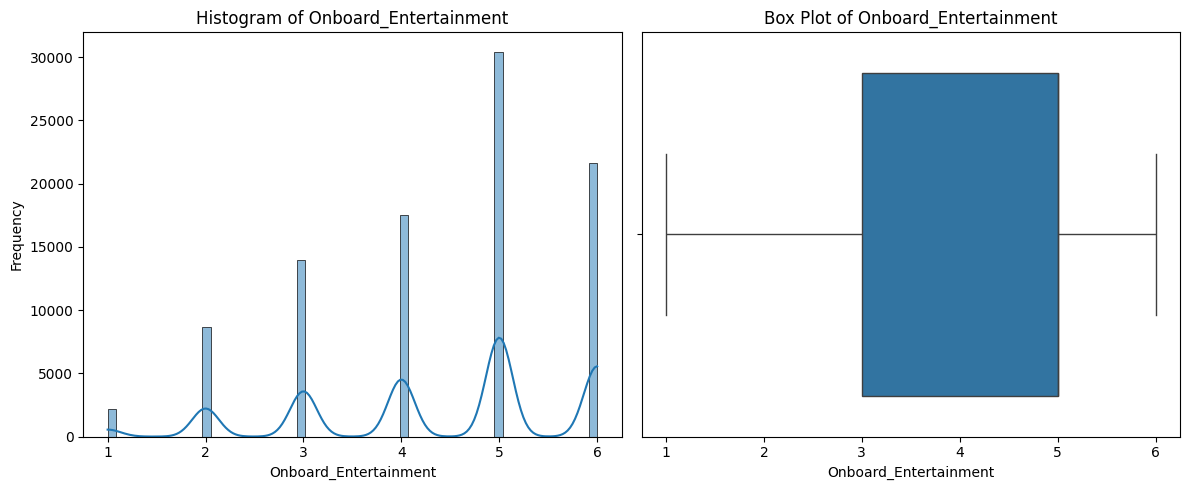

Processing column: Online_Support


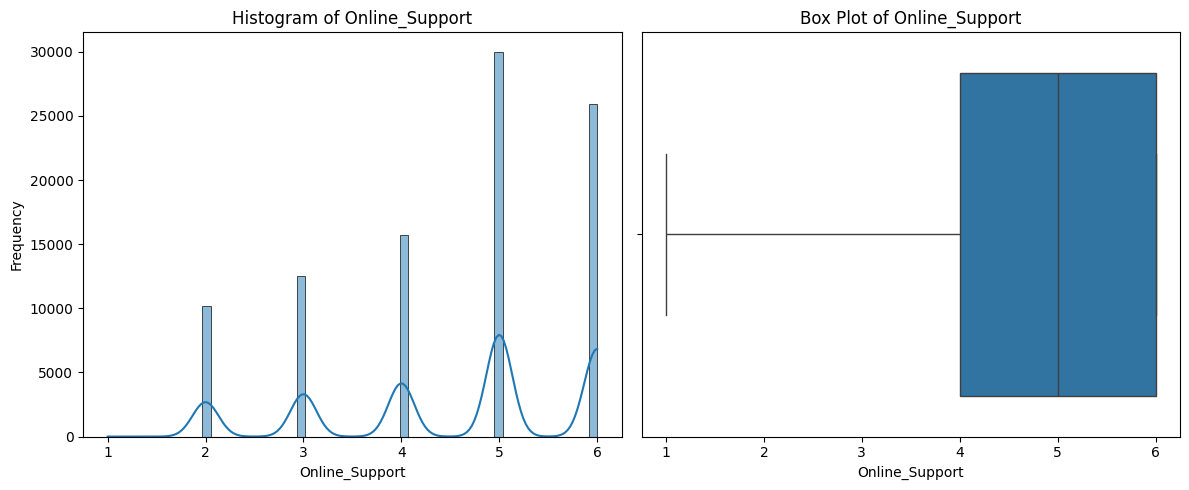

Processing column: Ease_of_Online_Booking


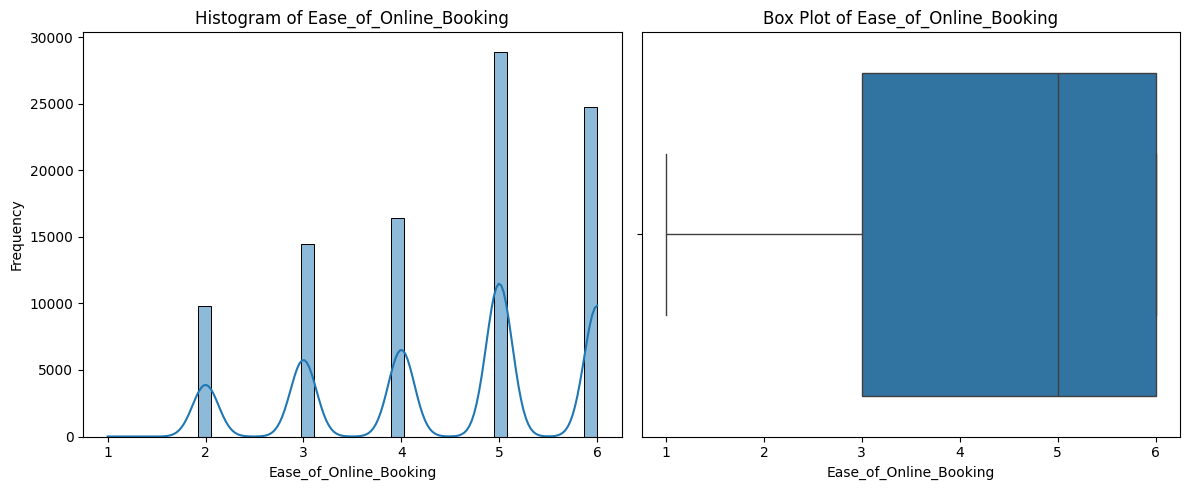

Processing column: Onboard_Service


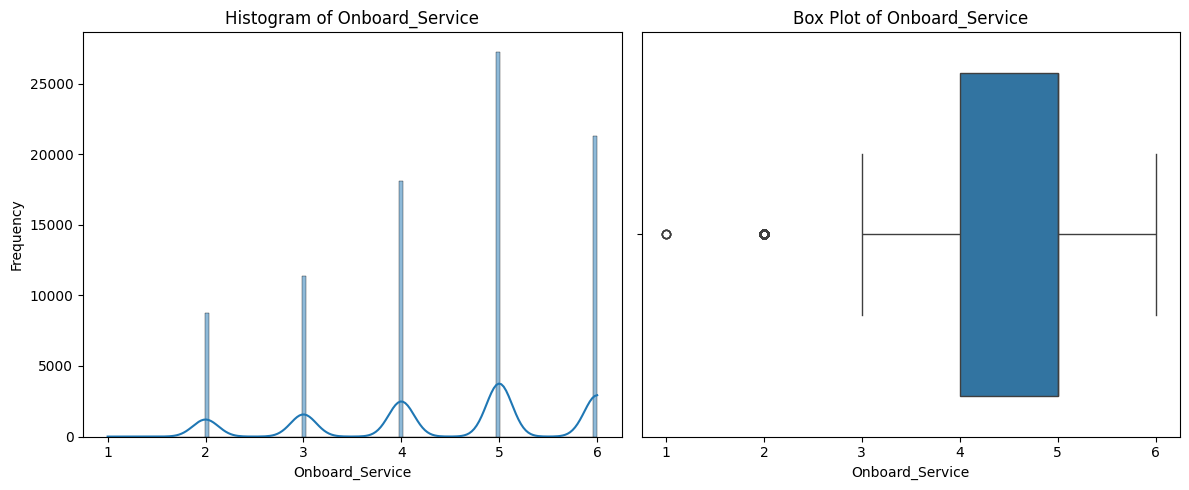

Processing column: Legroom


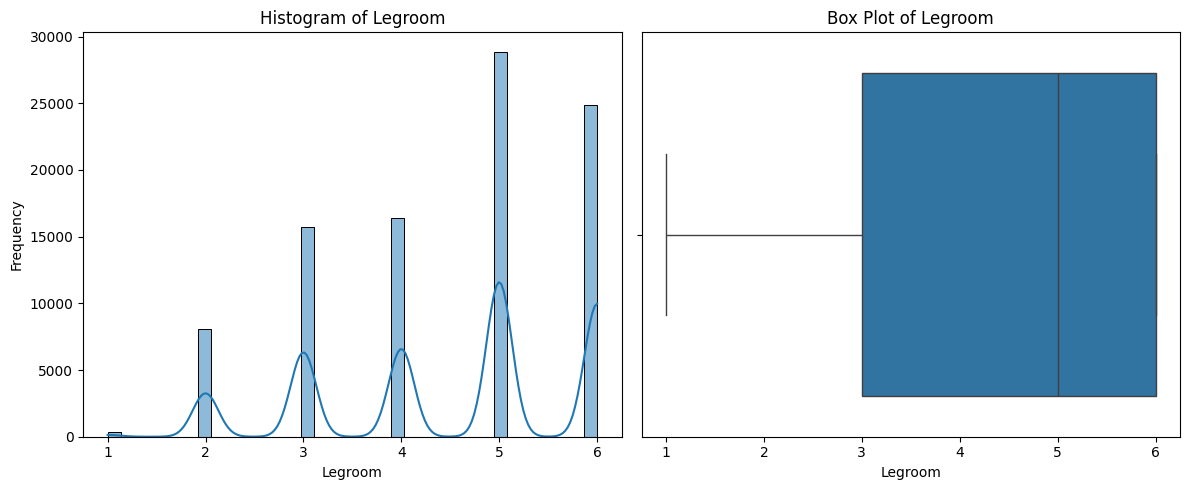

Processing column: Baggage_Handling


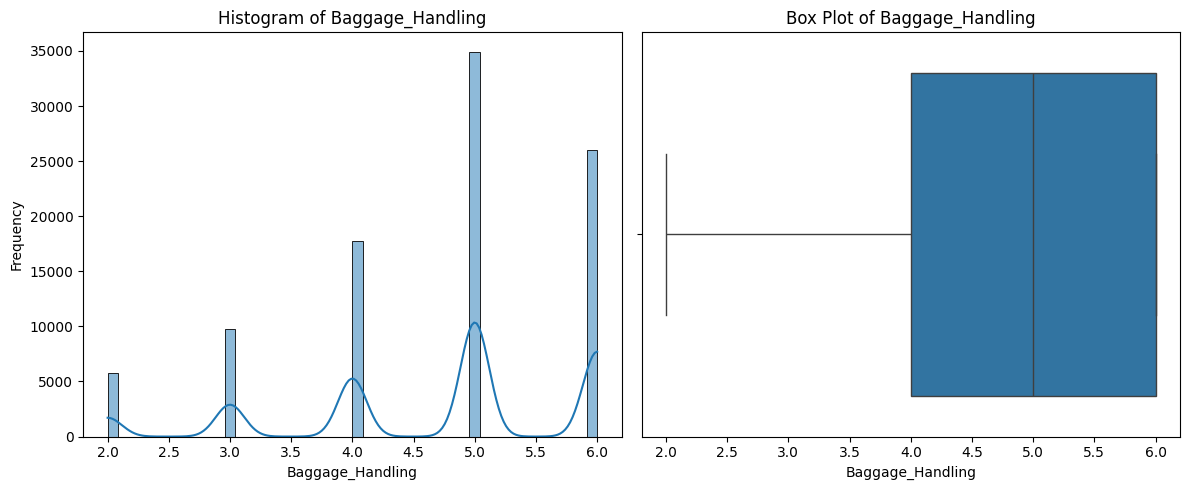

Processing column: CheckIn_Service


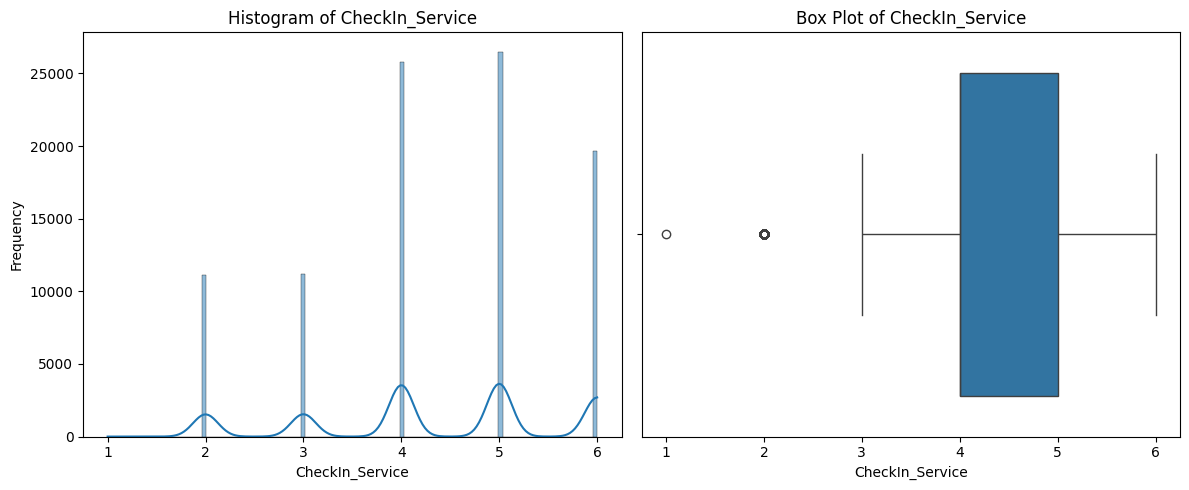

Processing column: Cleanliness


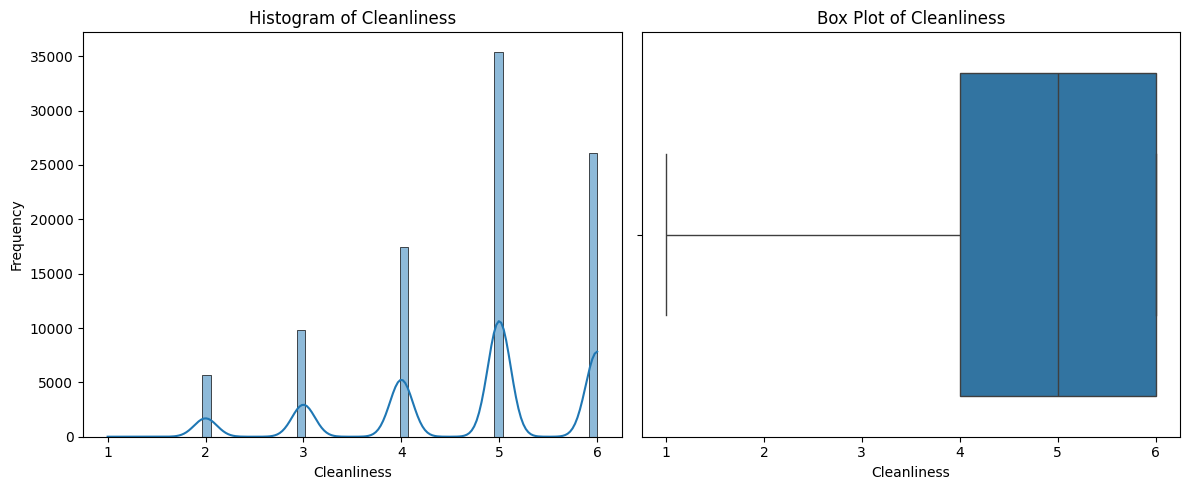

Processing column: Online_Boarding


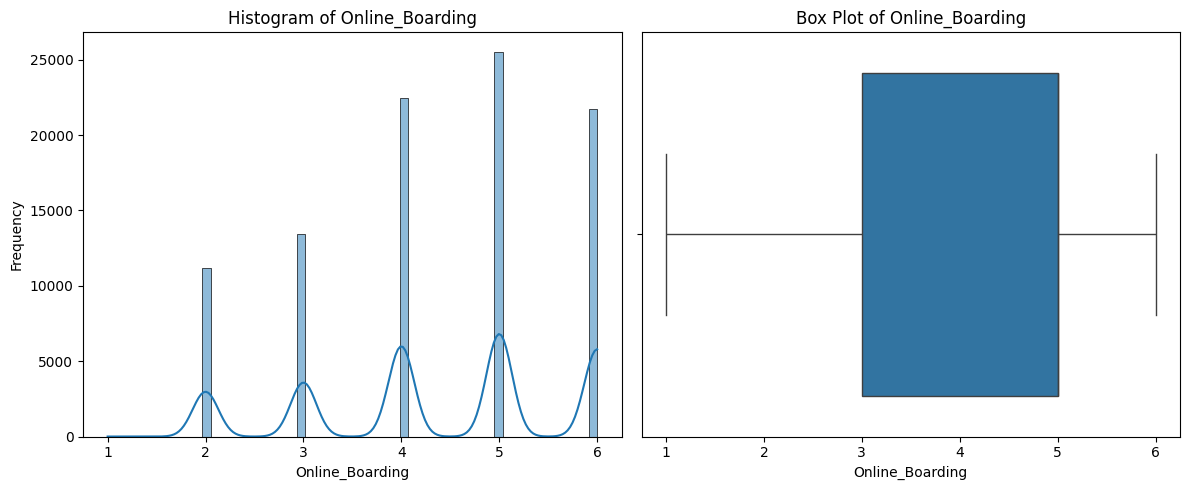

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    print(f"Processing column: {col}")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_merged[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_merged[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [7]:
numerical_cols_for_bivariate = df_merged.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols_for_bivariate.remove('Overall_Experience')
display(numerical_cols_for_bivariate)

['Age',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Seat_Comfort',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

Generate grouped histograms for each numerical column to compare distributions based on Overall_Experience.



Processing column: Age


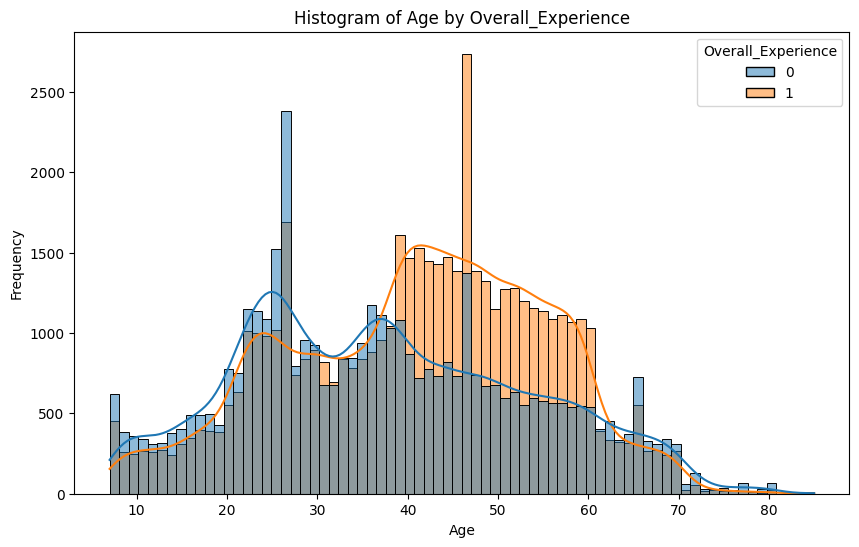

Processing column: Travel_Distance


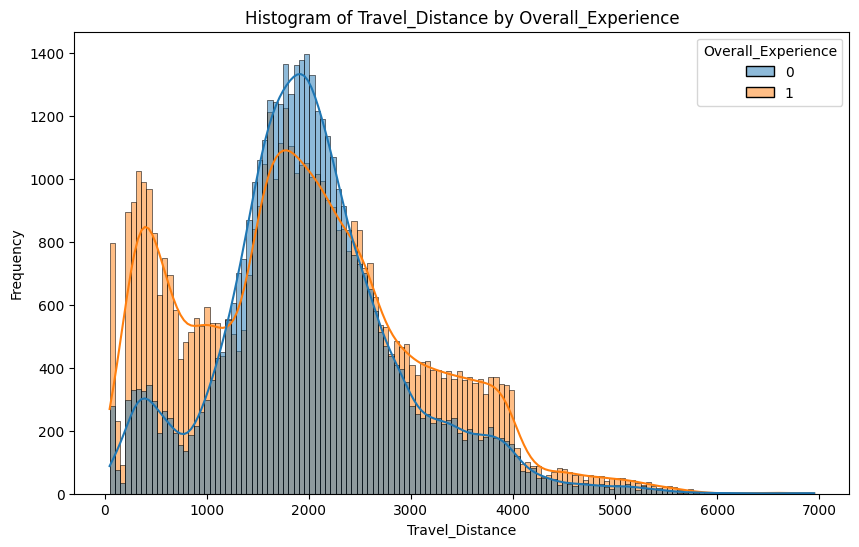

Processing column: Departure_Delay_in_Mins


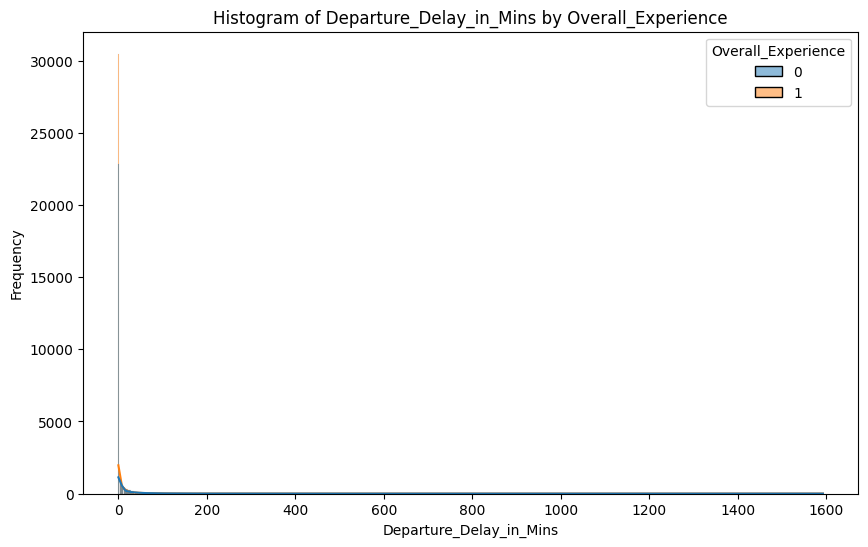

Processing column: Arrival_Delay_in_Mins


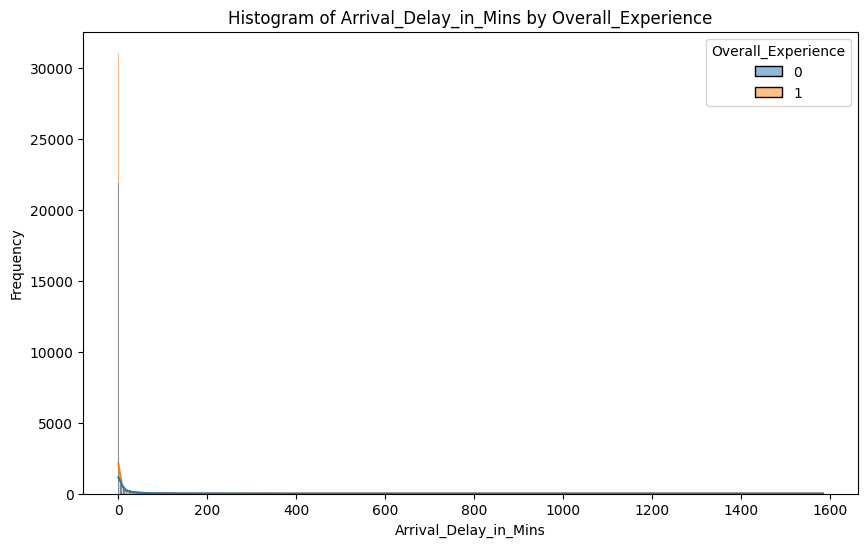

Processing column: Seat_Comfort


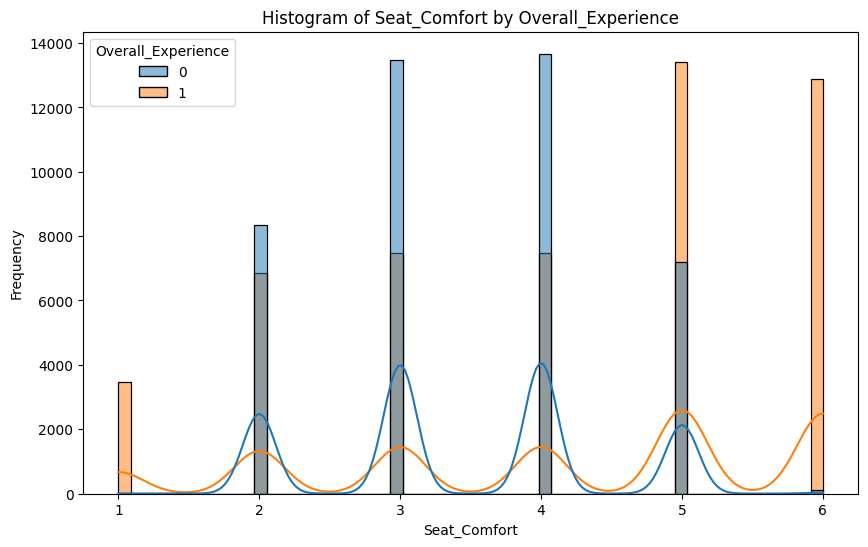

Processing column: Arrival_Time_Convenient


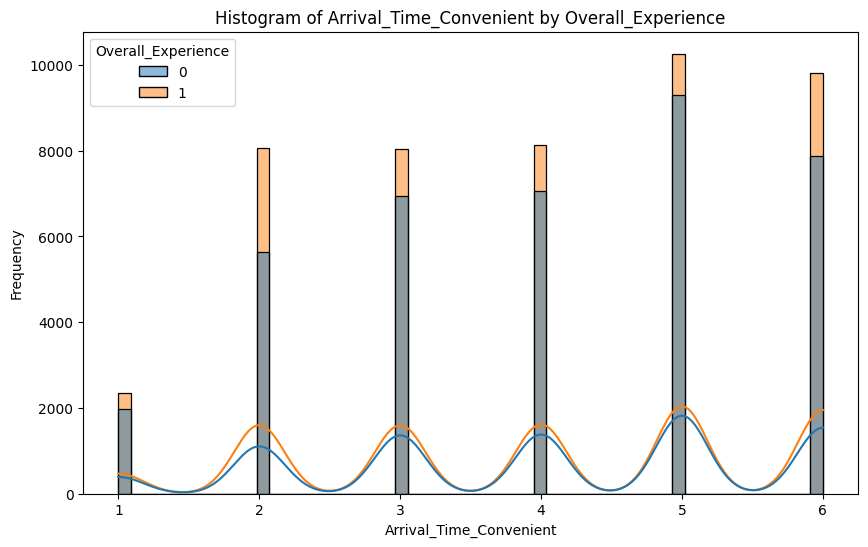

Processing column: Catering


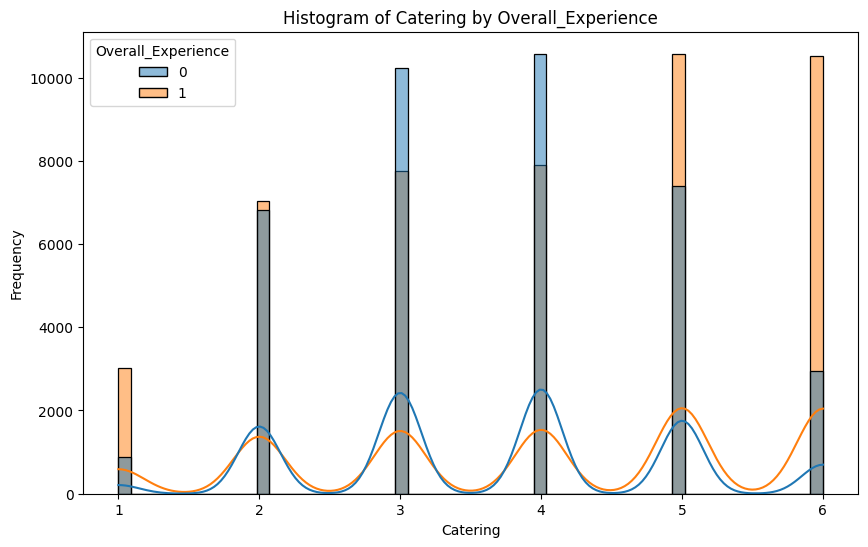

Processing column: Platform_Location


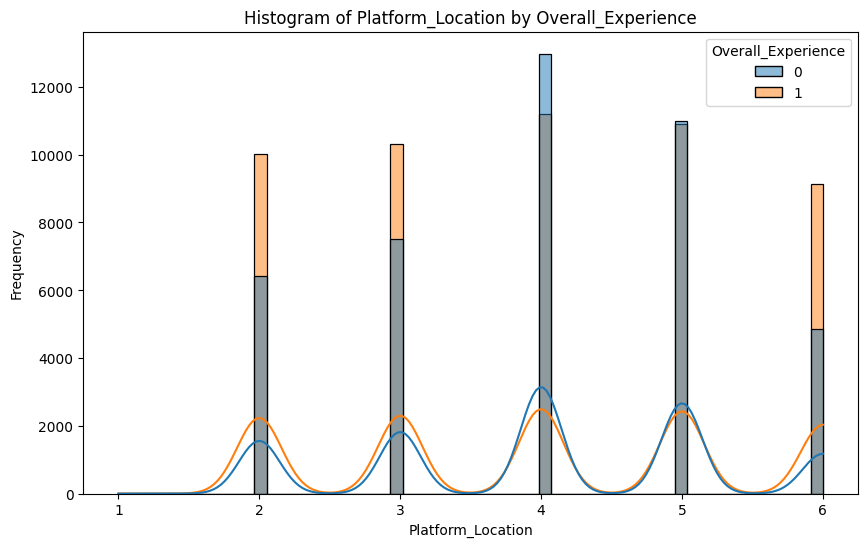

Processing column: Onboard_Wifi_Service


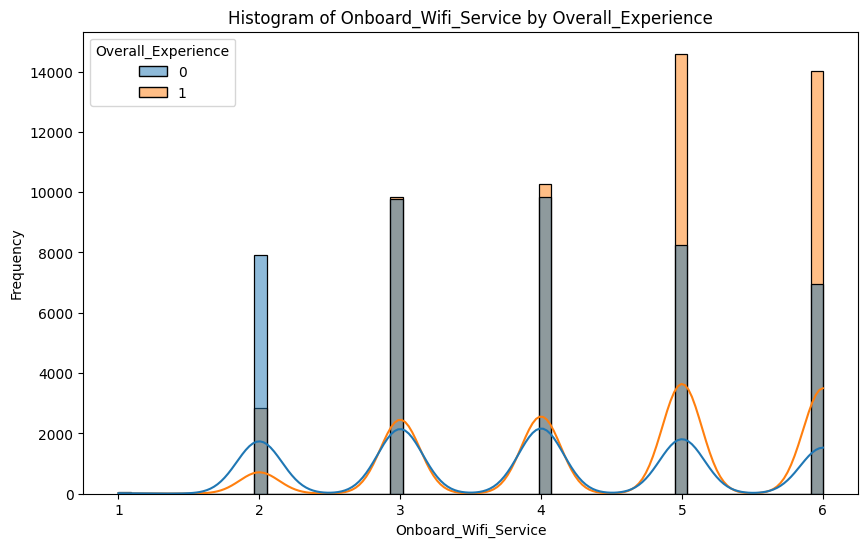

Processing column: Onboard_Entertainment


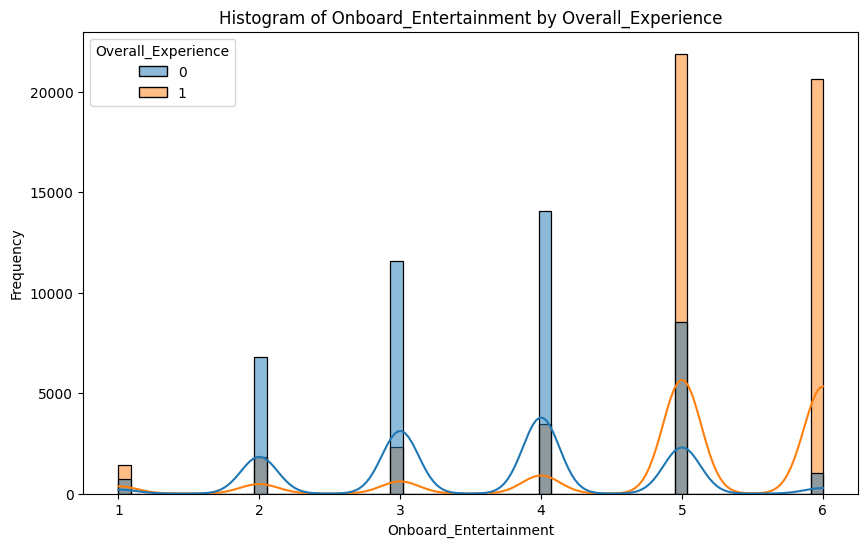

Processing column: Online_Support


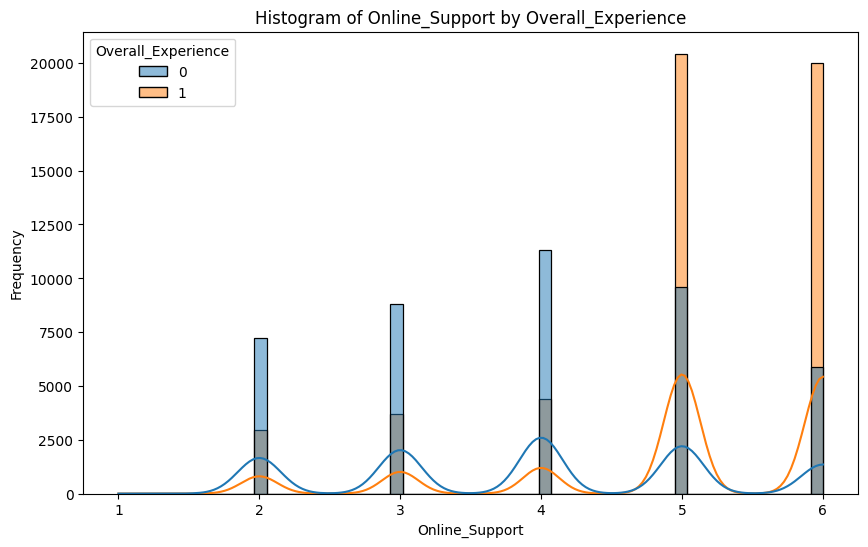

Processing column: Ease_of_Online_Booking


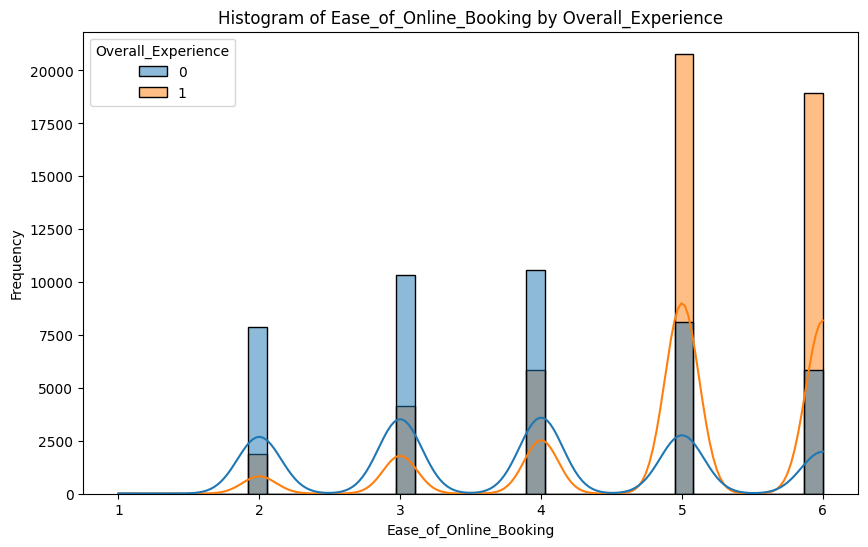

Processing column: Onboard_Service


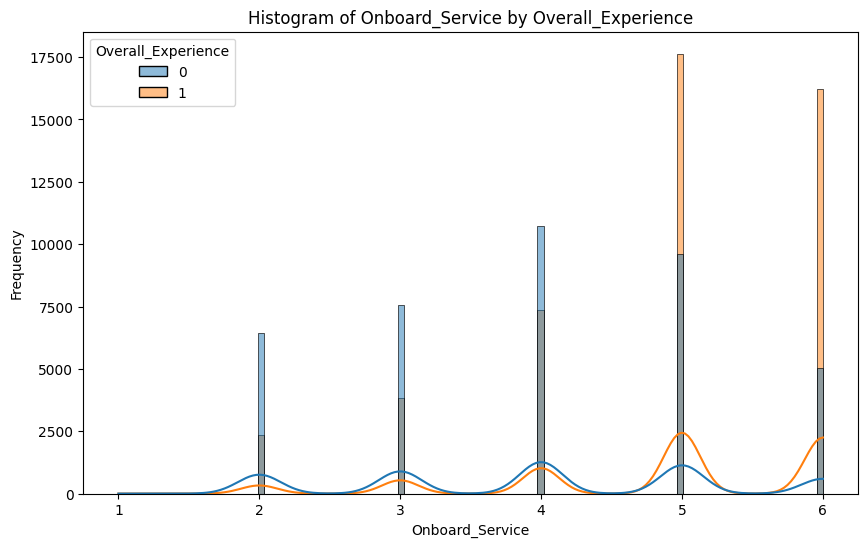

Processing column: Legroom


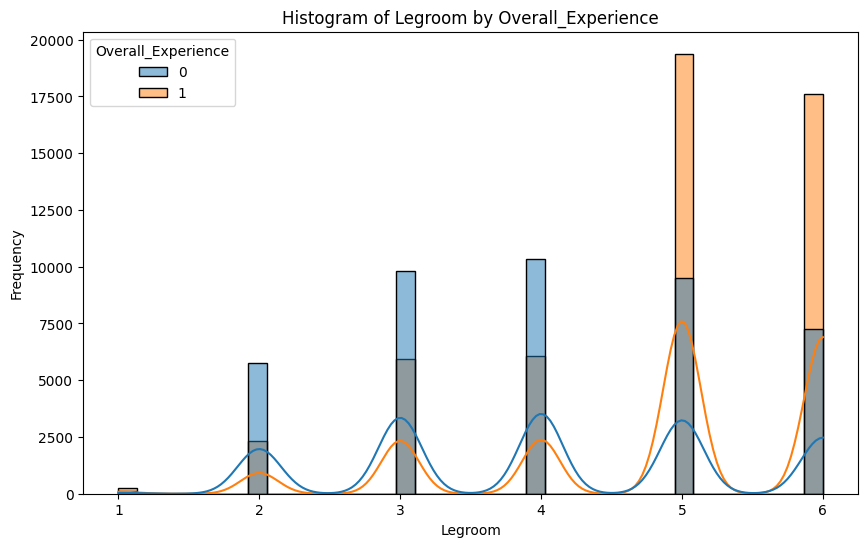

Processing column: Baggage_Handling


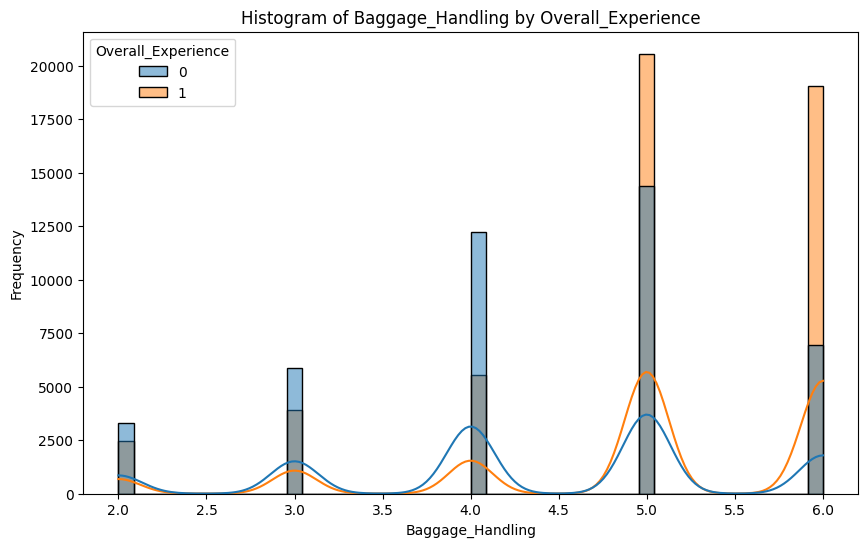

Processing column: CheckIn_Service


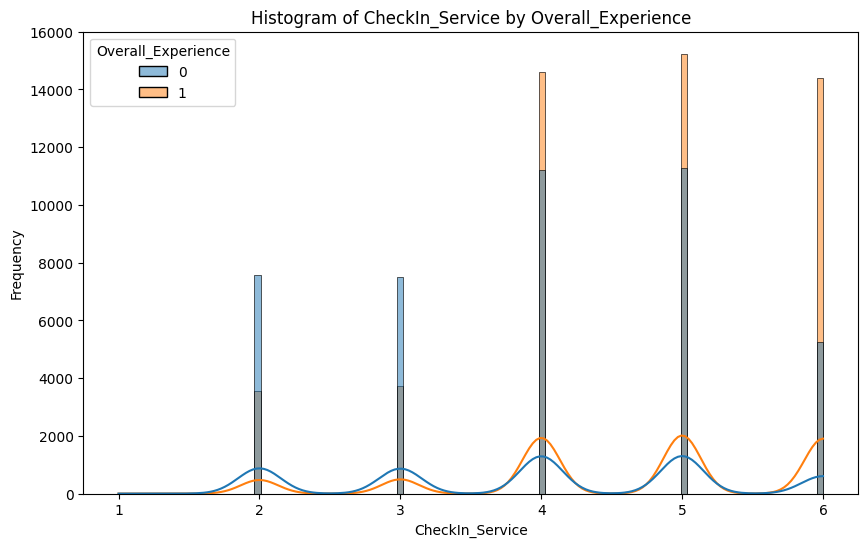

Processing column: Cleanliness


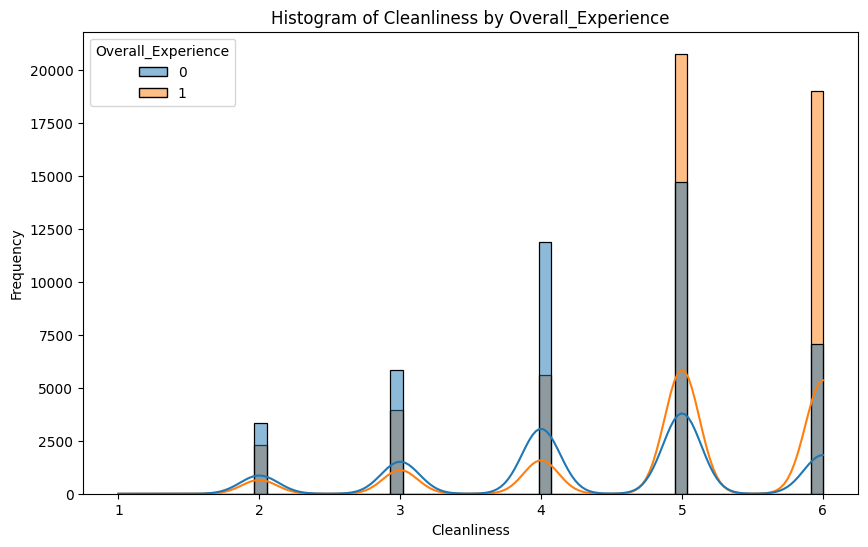

Processing column: Online_Boarding


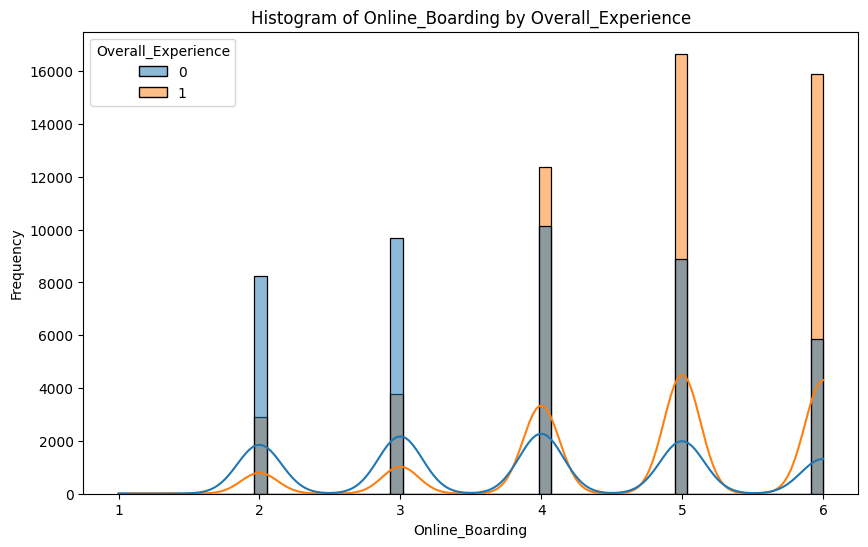

Grouped histograms generated for all numerical columns.


In [8]:
for col in numerical_cols_for_bivariate:
    print(f"Processing column: {col}")
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_merged, x=col, hue='Overall_Experience', kde=True)
    plt.title(f'Histogram of {col} by Overall_Experience')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("Grouped histograms generated for all numerical columns.")

Iterate through the numerical columns and create grouped box plots for each column based on 'Overall_Experience'.



Processing column for box plot: Age


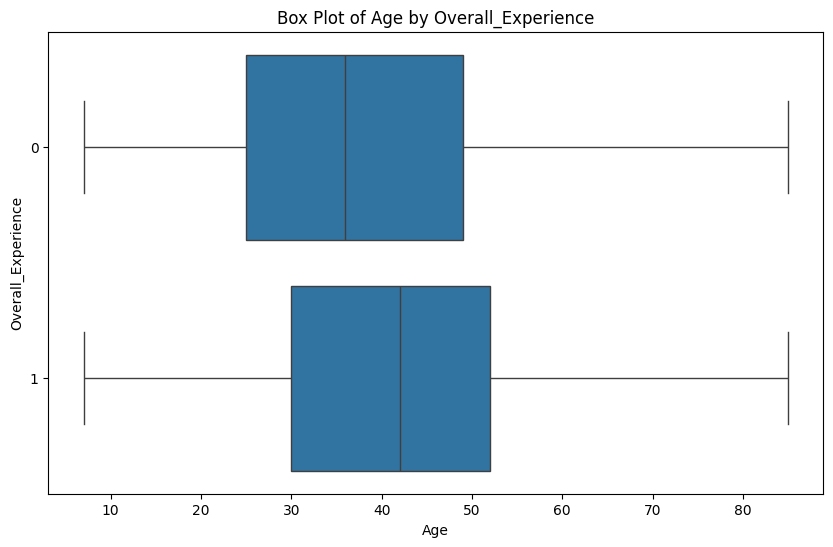

Processing column for box plot: Travel_Distance


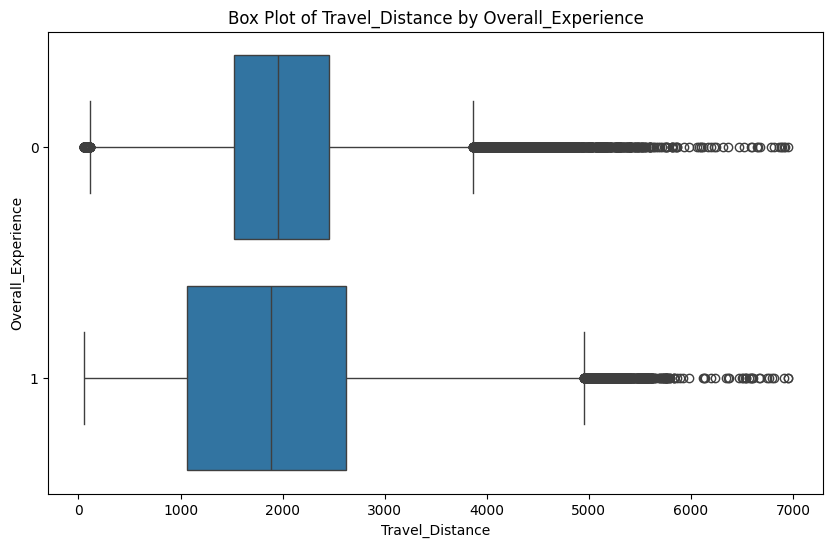

Processing column for box plot: Departure_Delay_in_Mins


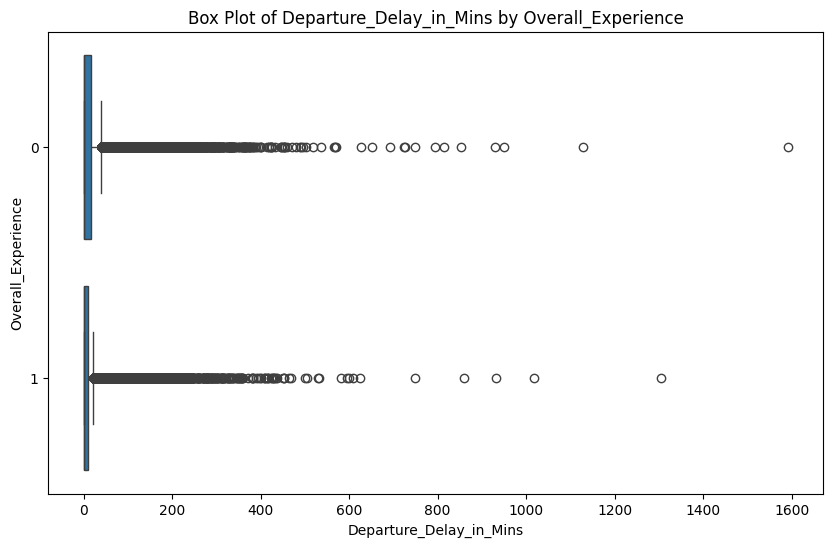

Processing column for box plot: Arrival_Delay_in_Mins


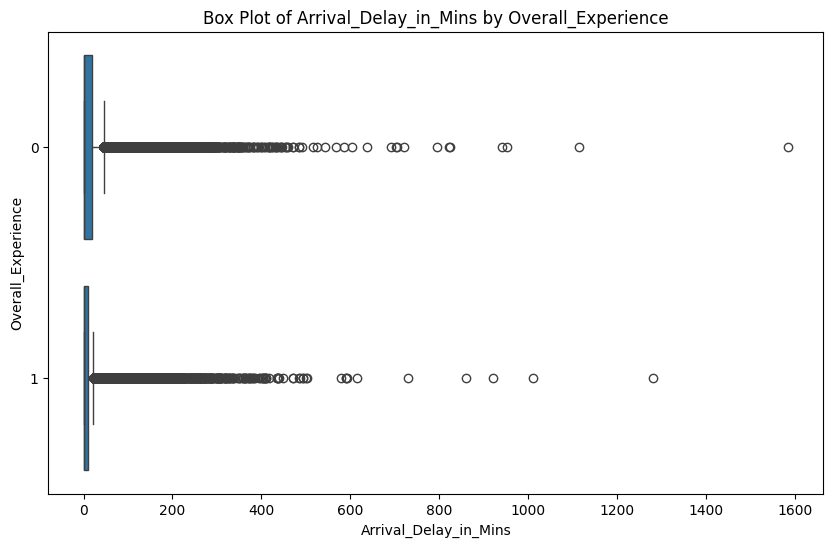

Processing column for box plot: Seat_Comfort


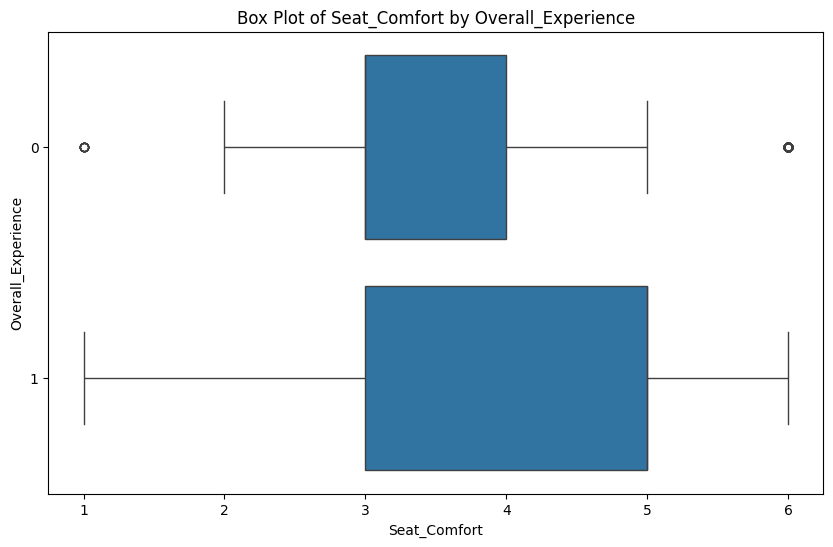

Processing column for box plot: Arrival_Time_Convenient


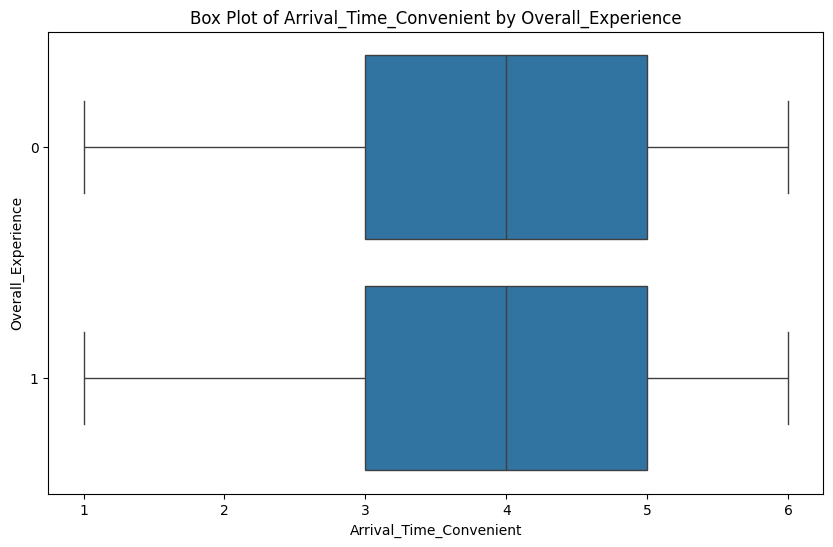

Processing column for box plot: Catering


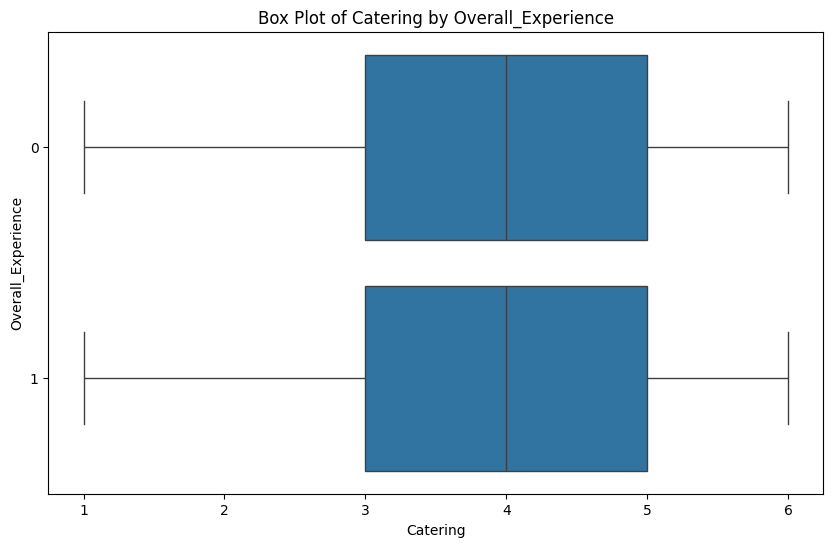

Processing column for box plot: Platform_Location


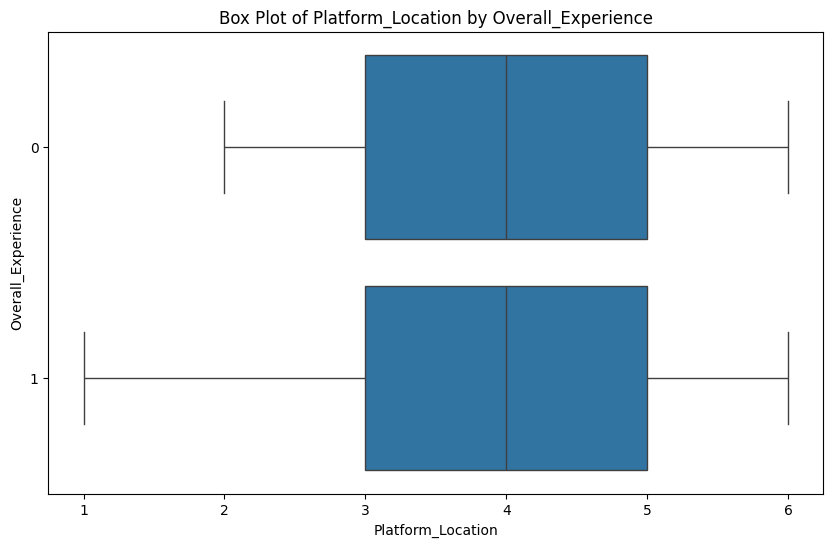

Processing column for box plot: Onboard_Wifi_Service


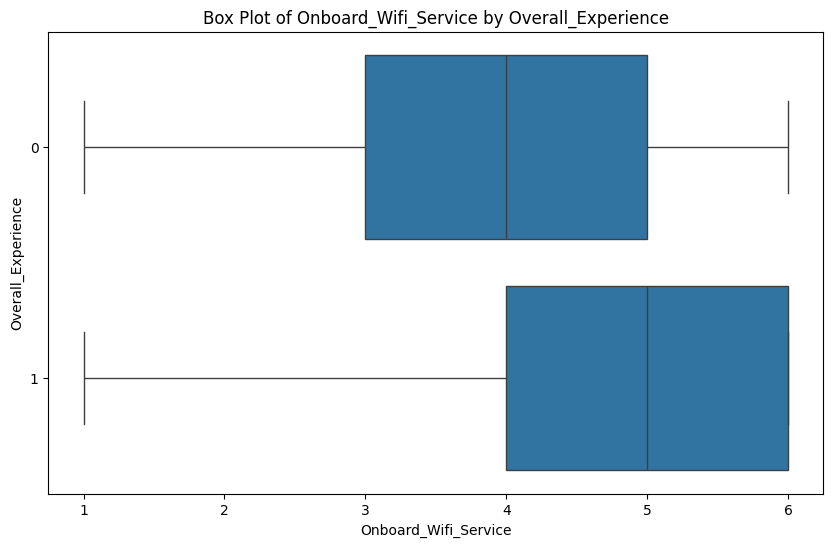

Processing column for box plot: Onboard_Entertainment


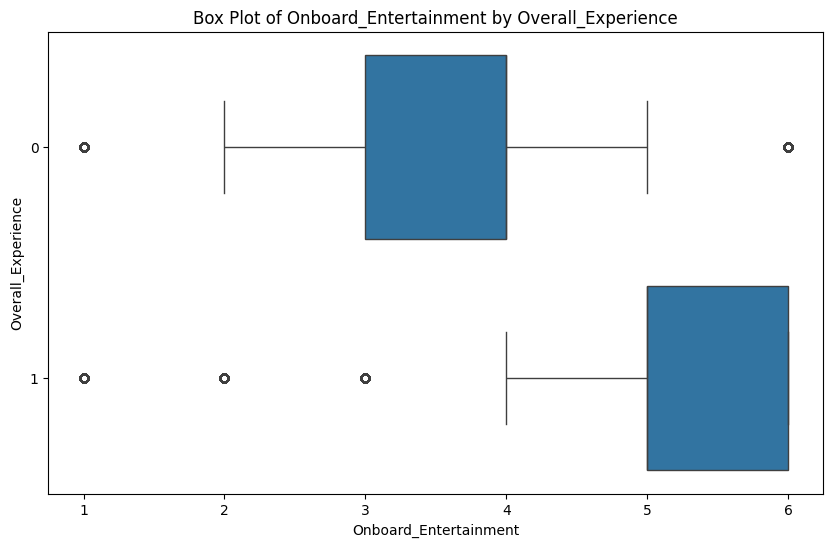

Processing column for box plot: Online_Support


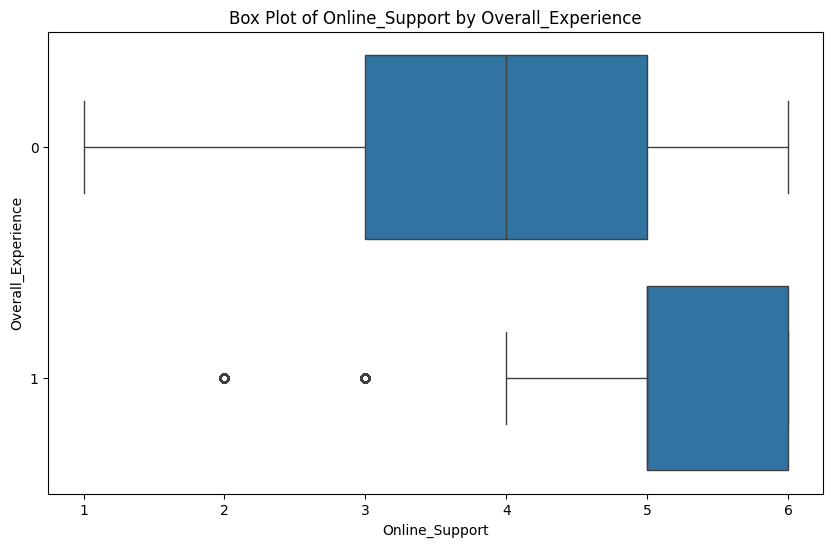

Processing column for box plot: Ease_of_Online_Booking


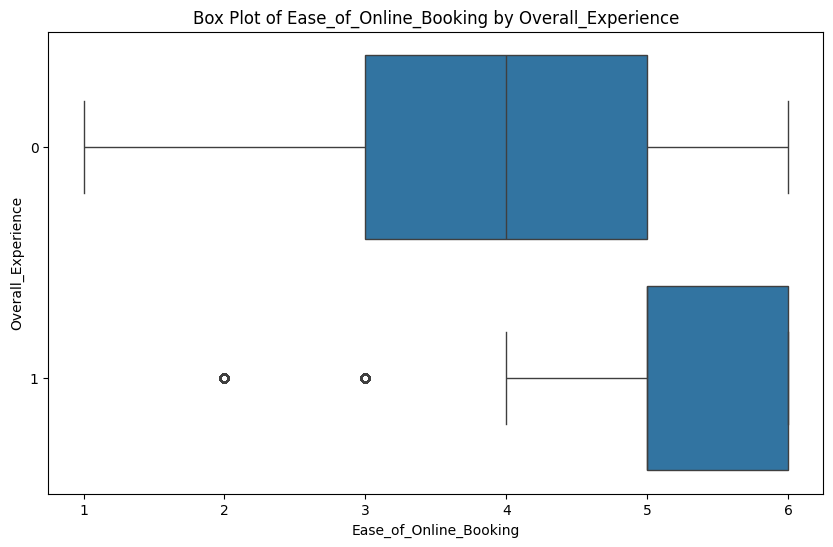

Processing column for box plot: Onboard_Service


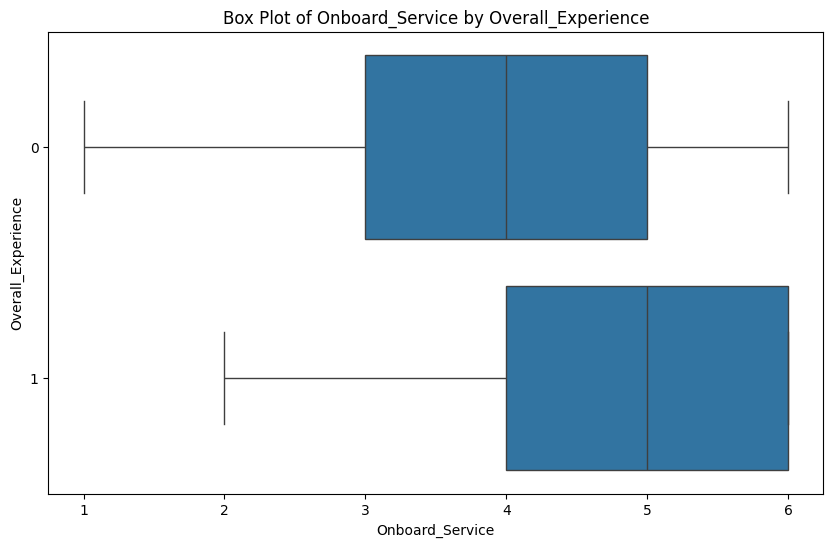

Processing column for box plot: Legroom


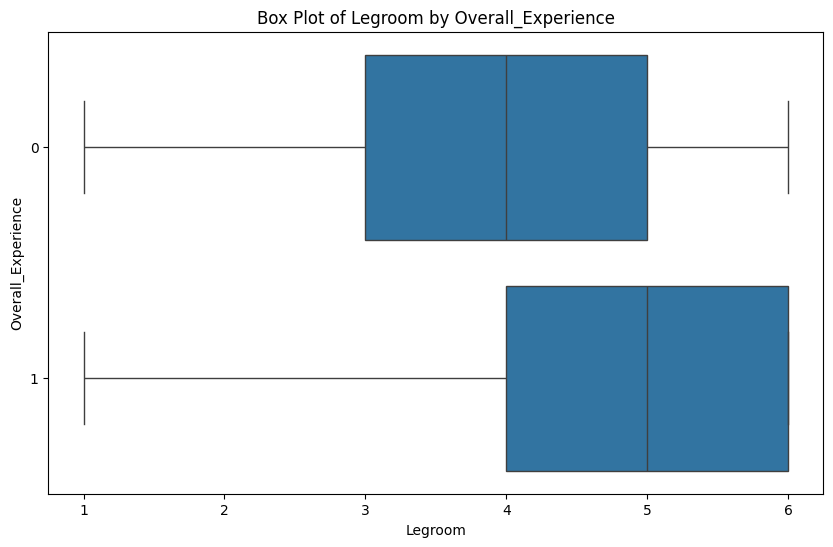

Processing column for box plot: Baggage_Handling


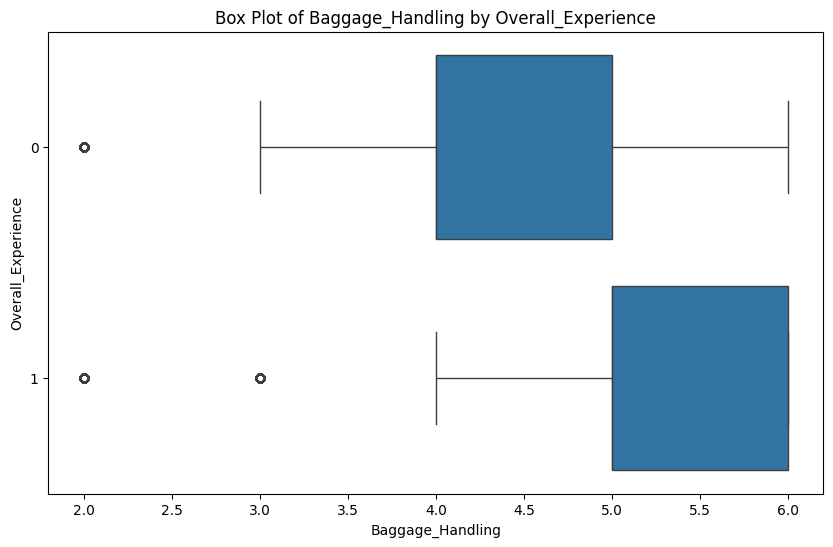

Processing column for box plot: CheckIn_Service


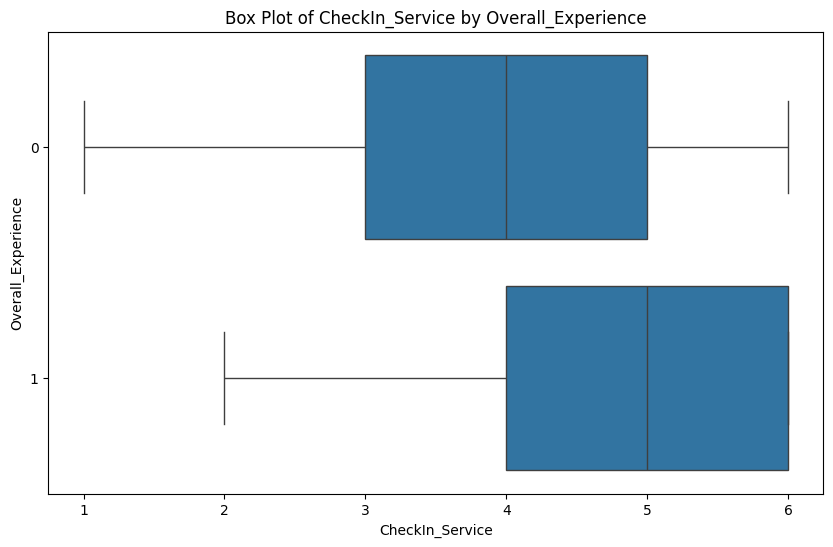

Processing column for box plot: Cleanliness


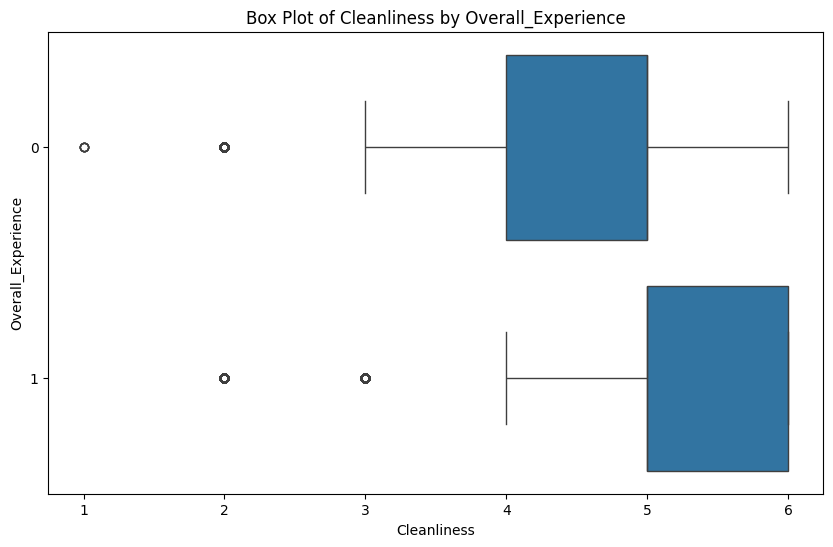

Processing column for box plot: Online_Boarding


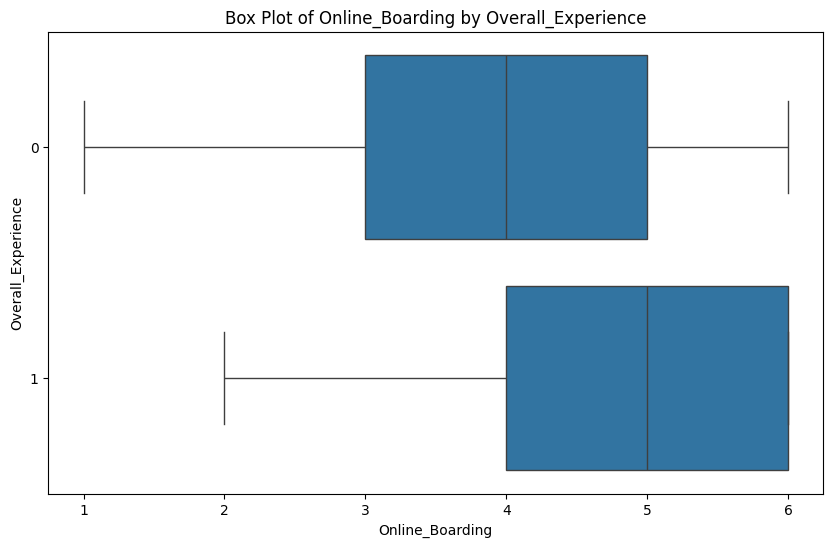

Grouped box plots generated for all numerical columns.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_bivariate = df_merged.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols_for_bivariate.remove('Overall_Experience')

for col in numerical_cols_for_bivariate:
    print(f"Processing column for box plot: {col}")
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_merged, x=col, y='Overall_Experience', orient='h')
    plt.title(f'Box Plot of {col} by Overall_Experience')
    plt.xlabel(col)
    plt.ylabel('Overall_Experience')
    plt.show()

print("Grouped box plots generated for all numerical columns.")

In [10]:
# prompt: For each categorical column in df_merged, show value counts for overall_experience.

import pandas as pd
for col in categorical_cols:
    print(f"\nValue Counts for {col} by Overall_Experience:")
    display(pd.crosstab(df_merged[col], df_merged['Overall_Experience'], dropna=False))
    print("-" * 30)


Value Counts for Gender by Overall_Experience:


Overall_Experience,0,1
Gender,,
Female,16636,31179
Male,26111,20376
NaN,39,38


------------------------------

Value Counts for Customer_Type by Overall_Experience:


Overall_Experience,0,1
Customer_Type,,
Disloyal Customer,11869,3736
Loyal Customer,26794,43029
NaN,4123,4828


------------------------------

Value Counts for Type_Travel by Overall_Experience:


Overall_Experience,0,1
Type_Travel,,
Business Travel,24441,34176
Personal Travel,14159,12377
NaN,4186,5040


------------------------------

Value Counts for Travel_Class by Overall_Experience:


Overall_Experience,0,1
Travel_Class,,
Business,13142,31895
Eco,29644,19698


------------------------------

Value Counts for Seat_Comfort by Overall_Experience:


Overall_Experience,0,1
Seat_Comfort,,
1.0,8,3455
2.0,8339,6846
3.0,13464,7482
4.0,13669,7489
5.0,7181,13414
6.0,96,12875
NaN,29,32


------------------------------

Value Counts for Seat_Class by Overall_Experience:


Overall_Experience,0,1
Seat_Class,,
Green Car,21434,26001
Ordinary,21352,25592


------------------------------

Value Counts for Arrival_Time_Convenient by Overall_Experience:


Overall_Experience,0,1
Arrival_Time_Convenient,,
1.0,1981,2351
2.0,5638,8054
3.0,6952,8038
4.0,7050,8127
5.0,9307,10267
6.0,7866,9818
NaN,3992,4938


------------------------------

Value Counts for Catering by Overall_Experience:


Overall_Experience,0,1
Catering,,
1.0,879,3031
2.0,6814,7044
3.0,10226,7752
4.0,10574,7894
5.0,7401,10568
6.0,2945,10510
NaN,3947,4794


------------------------------

Value Counts for Platform_Location by Overall_Experience:


Overall_Experience,0,1
Platform_Location,,
1.0,0,2
2.0,6422,10027
3.0,7504,10328
4.0,12985,11188
5.0,11009,10903
6.0,4853,9128
NaN,13,17


------------------------------

Value Counts for Onboard_Wifi_Service by Overall_Experience:


Overall_Experience,0,1
Onboard_Wifi_Service,,
1.0,56,35
2.0,7908,2833
3.0,9767,9829
4.0,9857,10261
5.0,8235,14600
6.0,6950,14018
NaN,13,17


------------------------------

Value Counts for Onboard_Entertainment by Overall_Experience:


Overall_Experience,0,1
Onboard_Entertainment,,
1.0,739,1405
2.0,6805,1836
3.0,11589,2337
4.0,14075,3485
5.0,8548,21898
6.0,1022,20622
NaN,8,10


------------------------------

Value Counts for Online_Support by Overall_Experience:


Overall_Experience,0,1
Online_Support,,
1.0,1,0
2.0,7205,2962
3.0,8790,3718
4.0,11300,4402
5.0,9582,20434
6.0,5877,20017
NaN,31,60


------------------------------

Value Counts for Ease_of_Online_Booking by Overall_Experience:


Overall_Experience,0,1
Ease_of_Online_Booking,,
1.0,16,0
2.0,7890,1878
3.0,10347,4132
4.0,10559,5831
5.0,8115,20794
6.0,5836,18908
NaN,23,50


------------------------------

Value Counts for Onboard_Service by Overall_Experience:


Overall_Experience,0,1
Onboard_Service,,
1.0,4,0
2.0,6425,2351
3.0,7547,3843
4.0,10708,7363
5.0,9625,17640
6.0,5032,16240
NaN,3445,4156


------------------------------

Value Counts for Legroom by Overall_Experience:


Overall_Experience,0,1
Legroom,,
1.0,106,234
2.0,5776,2334
3.0,9814,5939
4.0,10321,6063
5.0,9488,19382
6.0,7245,17587
NaN,36,54


------------------------------

Value Counts for Baggage_Handling by Overall_Experience:


Overall_Experience,0,1
Baggage_Handling,,
2.0,3311,2453
3.0,5875,3884
4.0,12205,5562
5.0,14382,20562
6.0,6949,19054
NaN,64,78


------------------------------

Value Counts for CheckIn_Service by Overall_Experience:


Overall_Experience,0,1
CheckIn_Service,,
1.0,1,0
2.0,7574,3563
3.0,7484,3734
4.0,11194,14609
5.0,11263,15239
6.0,5236,14405
NaN,34,43


------------------------------

Value Counts for Cleanliness by Overall_Experience:


Overall_Experience,0,1
Cleanliness,,
1.0,5,0
2.0,3328,2305
3.0,5849,3957
4.0,11859,5590
5.0,14678,20749
6.0,7067,18986
NaN,0,6


------------------------------

Value Counts for Online_Boarding by Overall_Experience:


Overall_Experience,0,1
Online_Boarding,,
1.0,12,0
2.0,8249,2911
3.0,9674,3777
4.0,10125,12350
5.0,8869,16664
6.0,5857,15885
NaN,0,6


------------------------------
